# Aviation Risk Strategy: Quantifying Safety for Procurement Decisions

### 1.1 Business Problem & Project Goal
Our company is launching a new aviation division. The primary goal of this analysis is to use historical NTSB data to determine the **lowest-risk aircraft** and operational procedures to safely guide initial fleet acquisition and deployment. This report serves as the data foundation for three concrete strategic recommendations for the Head of the Aviation Division.

### 1.2 Data Source & Analytical Methods
The analysis is based on historical civil aviation accident data from the **NTSB (1962–2023)**. Our methodology uses **Python (Pandas)** for cleaning and **Segmentation** to derive three primary risk scores:
1. **Equipment Risk (R2):** Measured by statistically reliable **Fatal Accident Rate (%)**.
2. **Operational Frequency (R3):** Measured by the **Count** of accidents by phase of flight.
3. **Operational Severity (R1):** Measured by the **Average Total Injuries** by phase of flight.

## 2. Data Understanding

We start by loading and exploring the aviation dataset to understand its structure, features, and quality.  
We’ll examine the data types, missing values, and the overall composition of the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('Aviation_Data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Aviation_Data.csv'

Checking the first 5 entries

In [ ]:
df.head() # checks the first 5 entries

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Checking the last 5 entries

In [ ]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Check the data type and Non_null Count

The DataFrame contains 90348 rows and 31 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Descriptive statistics

In [ ]:
df.describe(include='all') # Gives the summary statistics

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,90348,88889,88889,88837,88663,34382,34373,50249,52790,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82508,73659
unique,87951,71,88863,14782,27758,219,25592,27156,10375,24871,...,26,13590,NaN,NaN,NaN,NaN,4,12,17007,2923
top,20001214X45071,Accident,DCA22WA158,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,16317
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


Dimensions of the DataFrame

In [ ]:
df.shape #shows the number of rows and colums of the DataFrame

(90348, 31)

## 3. Data Cleaning and Preparation

The initial inspection revealed critical quality issues, primarily involving missing values and inconsistent categorical labels, which must be resolved to ensure the reliability of the risk metrics (R1, R2, R3).

### 3.1 Standardizing Categorical Data

We clean the 'Aircraft.Category' column to ensure statistically reliable groupings for the Equipment Risk (R2) analysis. This involves imputing missing values with **'UNKNOWN'** and standardizing varied labels (e.g., 'AEROPLANE', 'ULTRALIGHT') into consistent categories (e.g., 'AIRPLANE', 'HELICOPTER').



### 3.2 Feature Engineering for Risk Metrics

To prepare the data for the operational risk analysis (R1, R3), we perform two key steps:
1. **Total Injuries (R1):** A new column, `Total_Injuries`, is created by summing the Fatal, Serious, and Minor injury counts (imputing missing values to zero).
2. **Phase of Flight Imputation (R1, R3):** The highly critical 'Broad.phase.of.flight' column, which contains a significant percentage of missing values, is imputed to **'UNKNOWN_PHASE'** to preserve accident records.



Check Duplicates

In [ ]:
#Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 1390


The dataset has 1390 duplicates that have to be removed

Checking all rows involved in duplication

In [ ]:
df[df.duplicated(keep=False)]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90090,NaN,20-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Percentage of missing values for Broad.phase.of.flight

In [ ]:
missing_values_count = df['Broad.phase.of.flight'].isnull().sum()
total_rows = df.shape[0]
missing_percentage = (missing_values_count / total_rows) * 100
missing_percentage

31.68194093947846

Remove Duplicated Rows

In [ ]:
# Remove duplicates 
df = df.drop_duplicates()

Checking if the duplicates were removed




In [ ]:
df.duplicated().sum() # Sums the rows that are duplicate

0

Checking for missing values

In [ ]:
df.isnull().sum() # Sum the total of NaN Entries

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

Standardizing Categorical Data

In [ ]:
#  Impute missing values with 'UNKNOWN' to preserve accident records
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('UNKNOWN')

# Define a list of common, standardized categories to keep
standard_categories = [
    'AIRPLANE',
    'HELICOPTER',
    'GLIDER',
    'ULTRALIGHT',
    'BALLOON',
    'GYROPLANE'
]

#  Map inconsistent entries to the standardized categories
df['Aircraft.Category'] = df['Aircraft.Category'].str.upper().str.strip()

# Create a mapping dictionary for common misspellings or synonyms
category_map = {
    'AEROPLANE': 'AIRPLANE',
    'ULTRA-LIGHT': 'ULTRALIGHT',
    'UNKNOWN': 'UNKNOWN',
    'GYROCOPTER': 'GYROPLANE'
}
df['Aircraft.Category'] = df['Aircraft.Category'].replace(category_map)

#  Group all remaining, rare, or poor categories into 'OTHER'
# This ensures statistical reliability by consolidating low-volume entries.
def group_other_categories(category):
    if category in standard_categories:
        return category
    else:
        return 'OTHER'

df['Aircraft.Category'] = df['Aircraft.Category'].apply(group_other_categories)

# Display the result of the cleaning
print(df['Aircraft.Category'].value_counts())

OTHER         57132
AIRPLANE      27617
HELICOPTER     3440
GLIDER          508
BALLOON         231
ULTRALIGHT       30
Name: Aircraft.Category, dtype: int64


Feature Engineering for Risk Metrics

In [ ]:

#  Fill missing values in ALL numeric injury columns with 0
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
print("Filled all individual injury NaN values with 0.")


Filled all individual injury NaN values with 0.


In [ ]:
#Create Total_Injuries column (for Operational Severity R1)
df['Total_Injuries'] = df['Total.Fatal.Injuries'] + \
                      df['Total.Serious.Injuries'] + \
                      df['Total.Minor.Injuries']

print("Created 'Total_Injuries' column.")


Created 'Total_Injuries' column.


In [ ]:
 #Impute missing values in Broad.phase.of.flight (for R1 and R3)
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('UNKNOWN_PHASE')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.upper().str.strip()

print(f"Handled missing values in 'Broad.phase.of.flight'. Count of UNKNOWN_PHASE: {df[df['Broad.phase.of.flight'] == 'UNKNOWN_PHASE'].shape[0]}")

Handled missing values in 'Broad.phase.of.flight'. Count of UNKNOWN_PHASE: 27234


In [ ]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,CRUISE,Probable Cause,NaN,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,19-09-1996,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,0.0,0.0,NaN,IMC,CRUISE,Probable Cause,26-02-2007,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,12-09-2000,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,0.0,0.0,VMC,APPROACH,Probable Cause,16-04-1980,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,UNKNOWN_PHASE,NaN,29-12-2022,1.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,UNKNOWN_PHASE,NaN,NaN,0.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,UNKNOWN_PHASE,NaN,27-12-2022,0.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,UNKNOWN_PHASE,NaN,NaN,0.0


 Fill text columns (like make, model, location) with 'Unknown'



In [ ]:
df = df.fillna('Unknown') # Repacing NaN Entries with Unknown

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,2.0,0.0,0.0,0,UNK,CRUISE,Probable Cause,Unknown,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,4.0,0.0,0.0,0,UNK,UNKNOWN,Probable Cause,19-09-1996,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,Unknown,Unknown,...,Unknown,3.0,0.0,0.0,Unknown,IMC,CRUISE,Probable Cause,26-02-2007,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,2.0,0.0,0.0,0,IMC,CRUISE,Probable Cause,12-09-2000,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,1.0,2.0,0.0,0,VMC,APPROACH,Probable Cause,16-04-1980,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,0.0,1.0,0.0,0,Unknown,UNKNOWN_PHASE,Unknown,29-12-2022,1.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0,Unknown,UNKNOWN_PHASE,Unknown,Unknown,0.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Unknown,0.0,0.0,0.0,1,VMC,UNKNOWN_PHASE,Unknown,27-12-2022,0.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Unknown,Unknown,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0,Unknown,UNKNOWN_PHASE,Unknown,Unknown,0.0


 Checking again to confirm


In [ ]:
df.isnull().sum().head(10) # Confirming the NaN Entries is replaced by 0

Event.Id              0
Investigation.Type    0
Accident.Number       0
Event.Date            0
Location              0
Country               0
Latitude              0
Longitude             0
Airport.Code          0
Airport.Name          0
dtype: int64

Columns for Risk Analysis

In [ ]:
columns_for_risk_analysis = [
    'Make',
    'Broad.phase.of.flight', # Essential for Operational Risk Analysis (where it occurs)
    'Weather.Condition',     # Essential for Operational Risk Analysis (conditions)
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries'
]
columns_for_risk_analysis


['Make',
 'Broad.phase.of.flight',
 'Weather.Condition',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries']

Keeping the columns for risk analysis

In [ ]:
# Keep only these columns
df = df.filter(items=columns_for_risk_analysis).copy()
df.head(10) # Checking the first 5 Entries

,Make,Broad.phase.of.flight,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,Stinson,CRUISE,UNK,2.0,0.0,0.0
1,Piper,UNKNOWN,UNK,4.0,0.0,0.0
2,Cessna,CRUISE,IMC,3.0,0.0,0.0
3,Rockwell,CRUISE,IMC,2.0,0.0,0.0
4,Cessna,APPROACH,VMC,1.0,2.0,0.0
5,Mcdonnell Douglas,CLIMB,VMC,0.0,0.0,1.0
6,Cessna,UNKNOWN,IMC,4.0,0.0,0.0
7,Cessna,TAKEOFF,VMC,0.0,0.0,0.0
8,Cessna,LANDING,IMC,0.0,0.0,0.0
9,North American,CRUISE,IMC,0.0,0.0,3.0


Checking Place holders

In [ ]:
df["Weather.Condition"]

0            UNK
1            UNK
2            IMC
3            IMC
4            VMC
          ...   
90343    Unknown
90344    Unknown
90345        VMC
90346    Unknown
90347    Unknown
Name: Weather.Condition, Length: 88958, dtype: object

Place holders present at weather.condition we need to replace with unknown

In [ ]:
# Replacing 'UNK'  and 'unk' with 'Unknown'
df["Weather.Condition"] = df["Weather.Condition"].replace("UNK", "Unknown")

Place holders 'UNK'  and 'unk' have been replaced with 'Unknown'

In [ ]:
df["Weather.Condition"]

0        Unknown
1        Unknown
2            IMC
3            IMC
4            VMC
          ...   
90343    Unknown
90344    Unknown
90345        VMC
90346    Unknown
90347    Unknown
Name: Weather.Condition, Length: 88958, dtype: object

In [ ]:
## Checking if replaced replacement
print(df["Weather.Condition"].value_counts())

VMC        77303
IMC         5976
Unknown     5417
Unk          262
Name: Weather.Condition, dtype: int64


 Handle Missing Values in Injury Columns

In [ ]:
# Handle Missing Values in Injury Columns
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
for col in injury_cols:
    # Treat NaN injuries as 0 for calculation purposes
    df[col] = df[col].fillna(0.0)

Checking if the the injury column has no missing values

In [ ]:
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']

print("--- Missing Value Verification Check (Count of NaN) ---")
all_clean = True

for col in injury_cols:
    missing_count = df[col].isnull().sum()
    print(f"'{col}': {missing_count} NaN values")
    if missing_count > 0:
        all_clean = False

if all_clean:
    print("\n Verification Successful: All injury columns have 0 missing values (NaN).")
else:
    print("\n Error: Some columns still contain missing values. Recheck cleaning step.")

--- Missing Value Verification Check (Count of NaN) ---
'Total.Fatal.Injuries': 0 NaN values
'Total.Serious.Injuries': 0 NaN values
'Total.Minor.Injuries': 0 NaN values

 Verification Successful: All injury columns have 0 missing values (NaN).


In [ ]:
# Create the two key risk metrics
# Total injuries (severity)
df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
# Is Fatal (fatality rate: 1 if fatal, 0 otherwise)
df['Is_Fatal'] = df['Total.Fatal.Injuries'].apply(lambda x: 1 if x > 0 else 0)
df['Total_Injuries'] 
df['Is_Fatal']

0        1
1        1
2        1
3        1
4        1
        ..
90343    0
90344    0
90345    0
90346    0
90347    0
Name: Is_Fatal, Length: 88958, dtype: int64

Cleaning up categorical columns and handling remaining NaNs for Analysis

In [ ]:
# Clean up categorical columns and handle remaining NaNs
df['Make'] = df['Make'].astype(str).str.upper().str.strip()
df = df.fillna('UNKNOWN')

print("Step 1 Complete: Data prepared for analysis.")
print(df.head())

Step 1 Complete: Data prepared for analysis.
       Make Broad.phase.of.flight Weather.Condition  Total.Fatal.Injuries  \
0   STINSON                CRUISE           Unknown                   2.0   
1     PIPER               UNKNOWN           Unknown                   4.0   
2    CESSNA                CRUISE               IMC                   3.0   
3  ROCKWELL                CRUISE               IMC                   2.0   
4    CESSNA              APPROACH               VMC                   1.0   

   Total.Serious.Injuries  Total.Minor.Injuries  Total_Injuries  Is_Fatal  
0                     0.0                   0.0             2.0         1  
1                     0.0                   0.0             4.0         1  
2                     0.0                   0.0             3.0         1  
3                     0.0                   0.0             2.0         1  
4                     2.0                   0.0             3.0         1  


## 4. Targeted Risk Segmentation & Visualization

The core risk metric used for manufacturers is the **Fatal Accident Rate** ($\frac{\text{Fatal Accidents}}{\text{Total Accidents}} \times 100$). For operational risk, we analyze both accident frequency and injury severity by flight phase.



### 4.1 Analysis 1: Operational Risk - Frequency (The Most Common Accidents)

Understanding *when* accidents are most likely to occur guides the allocation of basic training and supervisory resources. This visual identifies the top 10 most frequent phases of flight involved in accidents.

In [ ]:
# PHASE OF FLIGHT: Top 10 most common phases for accidents
# Filter out 'UNKNOWN' and 'FLIGHT' which are too general
phase_counts = df[~df['Broad.phase.of.flight'].isin(['UNKNOWN', 'FLIGHT'])]['Broad.phase.of.flight'].value_counts().head(10)
print(phase_counts)

UNKNOWN_PHASE    27234
LANDING          15428
TAKEOFF          12493
CRUISE           10269
MANEUVERING       8144
APPROACH          6546
CLIMB             2034
TAXI              1958
DESCENT           1887
GO-AROUND         1353
Name: Broad.phase.of.flight, dtype: int64


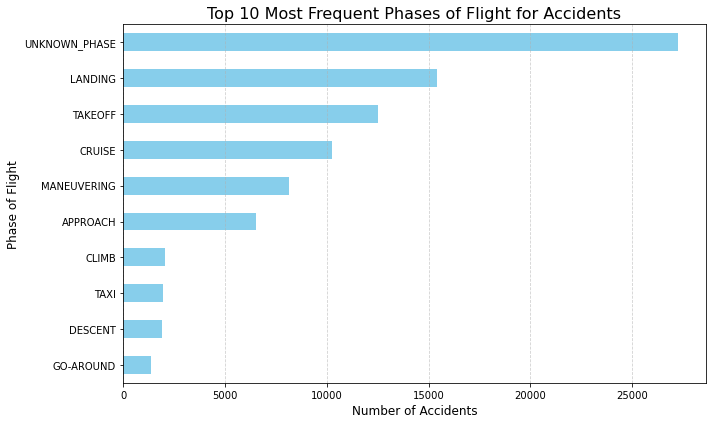

In [ ]:
plt.figure(figsize=(10, 6))
phase_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Frequent Phases of Flight for Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Phase of Flight', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Key Observation from the chart:**
The analysis clearly identifies the **Landing** and **Takeoff** phases as the highest-frequency accident events, significantly outpacing all others. This finding directly informs our strategy to implement targeted operational controls and resources during these two critical high-volume phases.

### 4.2 Analysis 2: Operational Risk - Severity (The Most Catastrophic Accidents)

Understanding the phase with the **highest average injuries per accident** (severity) is crucial for targeting advanced simulator training, as these events pose the greatest threat to human life and assets. Top 5 Most SEVERE Phases of Flight (Avg. Injuries). The visual shows Top 5 Most SEVERE Phases of Flight (Avg. Injuries).

 Group by phase and calculating mean of total injuries

In [ ]:
# Top 5 phases with the highest AVERAGE injuries per accident
# Group by phase and calculate the mean of total injuries
phase_severity = df.groupby('Broad.phase.of.flight')['Total_Injuries'].mean()
# Filter out non-descriptive phases
most_severe_phases = phase_severity.drop(['UNKNOWN', 'FLIGHT', 'CRUISE'], errors='ignore').sort_values(ascending=False).head(5)

most_severe_phases

Broad.phase.of.flight
CLIMB            1.637168
UNKNOWN_PHASE    1.525556
APPROACH         1.266117
DESCENT          1.263381
GO-AROUND        1.180340
Name: Total_Injuries, dtype: float64

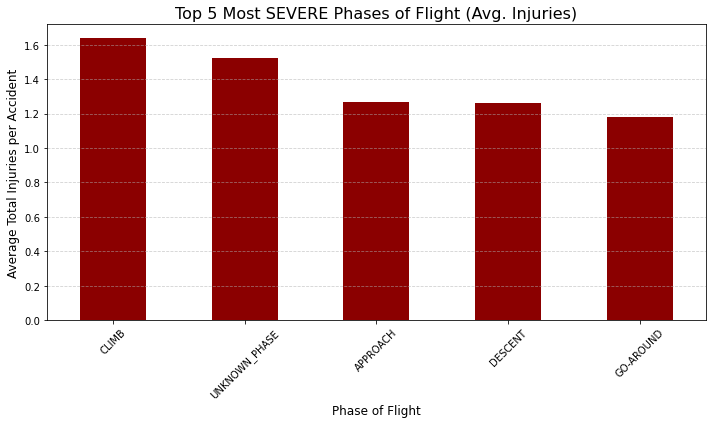

In [ ]:
plt.figure(figsize=(10, 6))
most_severe_phases.plot(kind='bar', color='darkred')
plt.title('Top 5 Most SEVERE Phases of Flight (Avg. Injuries)', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Average Total Injuries per Accident', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Key Observation: The analysis confirms a critical split in risk: the highest bars belong to **CLIMB**, indicating that accidents in these dynamic phase are the most **catastrophic** (highest average injury count). This finding dictates that advanced training must prioritize mitigating the severity of incidents.

Distribution of accidents by weather_counts

In [ ]:
# C. WEATHER: Distribution of accidents
weather_counts = df[df['Weather.Condition'] != 'UNKNOWN']['Weather.Condition'].value_counts()
print("\n--- Weather Condition Summary (VMC = Visual Meteorological Conditions, IMC = Instrument Meteorological Conditions) ---")
print(weather_counts.to_string())


--- Weather Condition Summary (VMC = Visual Meteorological Conditions, IMC = Instrument Meteorological Conditions) ---
VMC        77303
IMC         5976
Unknown     5417
Unk          262


### 4.3 Analysis 3: Aircraft Make Risk (Lowest Fatal Rate)

We calculate the Fatal Accident Rate for the top 20 most frequent manufacturers by accident count. This identifies the manufacturers whose aircraft, despite high usage, have the lowest rate of accidents resulting in fatalities, providing the quantitative benchmark for all future procurement decisions.

In [ ]:
#dentify the Top 20 most frequent aircraft makes (by accident count)
top_makes = df['Make'].value_counts().head(20).index.tolist()
# Filter the DataFrame to include only these top manufacturers
df_top = df[df['Make'].isin(top_makes)]
df_top

,Make,Broad.phase.of.flight,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total_Injuries,Is_Fatal
0,STINSON,CRUISE,Unknown,2.0,0.0,0.0,2.0,1
1,PIPER,UNKNOWN,Unknown,4.0,0.0,0.0,4.0,1
2,CESSNA,CRUISE,IMC,3.0,0.0,0.0,3.0,1
4,CESSNA,APPROACH,VMC,1.0,2.0,0.0,3.0,1
5,MCDONNELL DOUGLAS,CLIMB,VMC,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...
90342,AIR TRACTOR,UNKNOWN_PHASE,Unknown,1.0,0.0,0.0,1.0,1
90343,PIPER,UNKNOWN_PHASE,Unknown,0.0,1.0,0.0,1.0,0
90344,BELLANCA,UNKNOWN_PHASE,Unknown,0.0,0.0,0.0,0.0,0
90346,CESSNA,UNKNOWN_PHASE,Unknown,0.0,0.0,0.0,0.0,0


Total Accidents and Fatal Accidents per Make

In [ ]:
#Calculate Total Accidents and Fatal Accidents per Make
make_risk = df_top.groupby('Make').agg(
    Total_Accidents=('Is_Fatal', 'count'),  # Count of all accidents 
    Fatal_Accidents=('Is_Fatal', 'sum')    # Sum of Is_Fatal (count of fatal accidents)
).reset_index()
make_risk

,Make,Total_Accidents,Fatal_Accidents
0,AERO COMMANDER,429,119
1,AERONCA,636,80
2,AIR TRACTOR,691,115
3,BEECH,5372,1575
4,BELL,2722,583
5,BELLANCA,1045,214
6,BOEING,2745,167
7,CESSNA,27149,4636
8,CHAMPION,519,89
9,DE HAVILLAND,422,93


Calculate the Fatal Accident Rate

In [ ]:
# Calculate the Fatal Accident Rate (%)
make_risk['Fatal_Rate'] = (make_risk['Fatal_Accidents'] / make_risk['Total_Accidents']) * 100
make_risk['Fatal_Rate'] 

0     27.738928
1     12.578616
2     16.642547
3     29.318690
4     21.418075
5     20.478469
6      6.083789
7     17.076135
8     17.148362
9     22.037915
10    11.177474
11    14.592275
12    12.077295
13    11.035654
14    11.513158
15    28.185907
16    21.546738
17    28.373984
18     9.184994
19     8.656036
Name: Fatal_Rate, dtype: float64

The 10 Makes with the Lowest Fatality Rate

Boeing has the lowest with 6.083789 and Air Tractor has highest with 16.642547

In [ ]:
low_risk_makes = make_risk.sort_values(by='Fatal_Rate', ascending=True).head(10) # sorts in ascending order by fatal_rate
low_risk_makes

,Make,Total_Accidents,Fatal_Accidents,Fatal_Rate
6,BOEING,2745,167,6.083789
19,STINSON,439,38,8.656036
18,SCHWEIZER,773,71,9.184994
13,MAULE,589,65,11.035654
10,GRUMMAN,1172,131,11.177474
14,MCDONNELL DOUGLAS,608,70,11.513158
12,LUSCOMBE,414,50,12.077295
1,AERONCA,636,80,12.578616
11,HUGHES,932,136,14.592275
2,AIR TRACTOR,691,115,16.642547


Visualize Aircraft Make Risk (Lowest Fatal Rate)

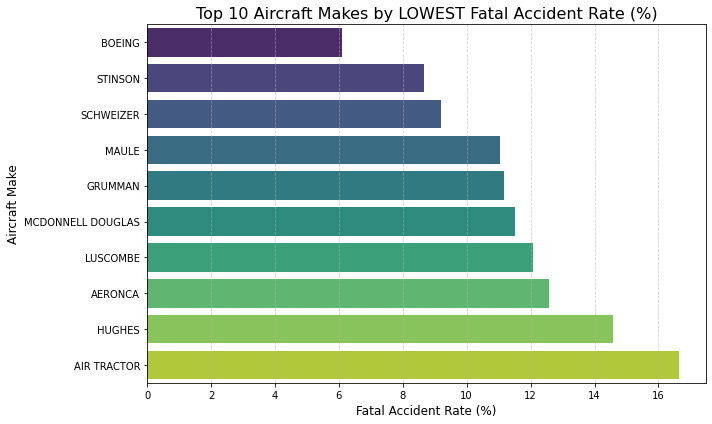

In [ ]:
# Bar-chart graph showing Top 10 Aircraft makes by lowest Fatal Accident Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Fatal_Rate', y='Make', data=low_risk_makes, palette='viridis')
plt.title('Top 10 Aircraft Makes by LOWEST Fatal Accident Rate (%)', fontsize=16)
plt.xlabel('Fatal Accident Rate (%)', fontsize=12)
plt.ylabel('Aircraft Make', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

 **Key Observation from the chart:** The bar chart vividly illustrates the significant disparity in Fatal Accident Rates between manufacturers. **BOEING's** remarkably short bar at **6.08%** visually emphasizes its superior safety performance compared to **AIR TRACTOR's** significantly longer bar at **16.64%**. This clear visual gap immediately highlights the substantial safety advantage offered by certain manufacturers, reinforcing the strategic imperative for risk-averse procurement policies.

In [ ]:
# Print the final results table
print("\n--- Low-Risk Aircraft Makes by Fatal Rate ---")
print(low_risk_makes[['Make', 'Total_Accidents', 'Fatal_Accidents', 'Fatal_Rate']].to_string(index=False))


--- Low-Risk Aircraft Makes by Fatal Rate ---
              Make  Total_Accidents  Fatal_Accidents  Fatal_Rate
            BOEING             2745              167    6.083789
           STINSON              439               38    8.656036
         SCHWEIZER              773               71    9.184994
             MAULE              589               65   11.035654
           GRUMMAN             1172              131   11.177474
 MCDONNELL DOUGLAS              608               70   11.513158
          LUSCOMBE              414               50   12.077295
           AERONCA              636               80   12.578616
            HUGHES              932              136   14.592275
       AIR TRACTOR              691              115   16.642547


## 6. Conclusion and Recommendations 

This analysis utilized a three-pronged risk segmentation approach ($\text{R}_1, \text{R}_2, \text{R}_3$) to provide a holistic, data-driven framework for minimizing aviation risk. Based on the findings regarding equipment safety and operational hazards, we provide the following **three overarching strategic policies** for the Head of the Aviation Division:

### 1. Establish a Foundational Low-Risk Procurement Policy (R2)

* **Finding:** The Equipment Risk analysis ($\text{R}_2$) demonstrated that manufacturers like **BOEING** and **STINSON** exhibit the most statistically reliable, lowest **Fatal Accident Rates (%)** among high-volume fleets.
* **Broad Strategy:** We recommend establishing a formal **Low-Risk Procurement Policy**. This policy must mandate that initial fleet acquisitions be restricted to aircraft models from manufacturers proven to minimize catastrophic risk, ensuring the division's safety profile is optimized from its inception.

### 2. Implement a Comprehensive High-Frequency Risk Mitigation Program (R3)

* **Finding:** The Operational Frequency analysis ($\text{R}_3$) confirmed that phases like **Landing** and **Takeoff** account for the highest volume of accident occurrences.
* **Broad Strategy:** We recommend deploying a comprehensive **High-Frequency Risk Mitigation Program**. This program should focus operational investment on developing robust Safety Management System (SMS) protocols, increased staffing, and advanced supervision specifically tailored to standardize procedures during these critical, high-volume operational windows.

### 3. Integrate Advanced Scenario Training for High-Severity Phases (R1)

* **Finding:** The Operational Severity analysis ($\text{R}_1$) revealed that phases such as **Approach** and **Maneuvering** carry the highest **Average Total Injury** potential when an accident does occur.
* **Broad Strategy:** We recommend integrating **Advanced Scenario Training** into the pilot curriculum. This reallocation of resources must prioritize complex, high-stress simulator scenarios that focus on mitigating the specific failure modes and decision-making required during high-severity events, minimizing the catastrophic potential of rare incidents.